#### Cropping and padding the Right box of the Gun active or not active (gun firing time bullet numbers are smaller)

###### This is for one Image Rightside one

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


(540, 1216, 3)

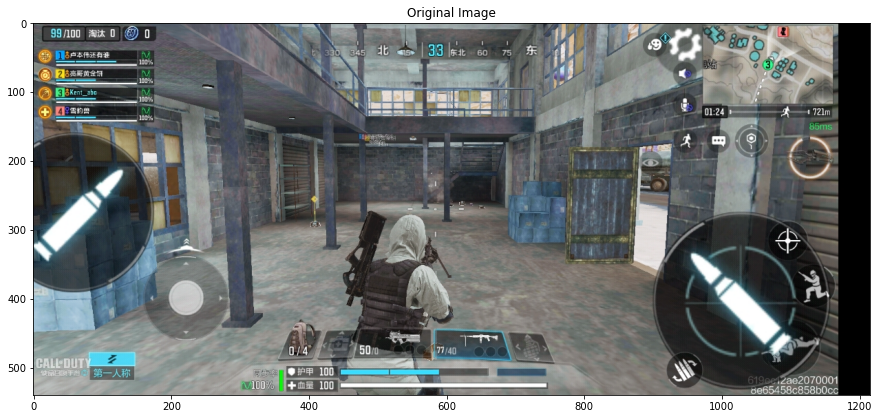

(49, 117, 3)

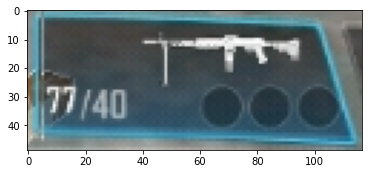

(14, 24, 3)

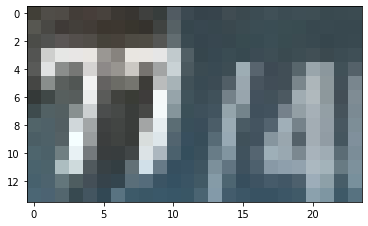

(14, 24)

selcted Point:  12


(14, 24)

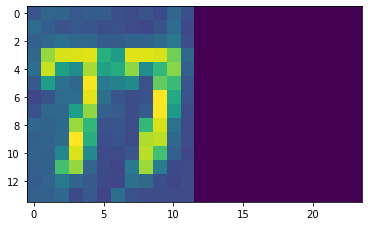

True

In [2]:
#You can directly convert the BGR image to RGB
img = cv2.imread("/Users/kpangalu/Downloads/test/gamehaptics_3312.png")
# img = cv2.imread(r"C:\Users\kpangalu\Downloads\activeempty_gun\gamehaptics_2380.png")[:,:,::-1]
display(img.shape)

plt.figure(figsize = (15,15))
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)
plt.title('Original Image')
plt.show()

#Image cropping at particular region (GUn region)
# imgcrop1 = img[440:487,464:580] #LEFT IMAGE
imgcrop1 = img[443:492, 580:697] # Right image

plt.imshow(imgcrop1)
display(imgcrop1.shape)
plt.show()

#Pick the bullet number from Right image box
YTL = 467
XTL = 586
YBR = 481
XBR = 610

imgcrop2 = img[YTL:YBR, XTL:XBR]
plt.imshow(imgcrop2)
display(imgcrop2.shape)
plt.show()

#padding applying some threshold value
imgg = imgcrop2[:,:,0]
# imgg = imgcrop2[:,:]
display(imgg.shape)

h = imgg.shape[0]
w = imgg.shape[1]

img_thres = np.zeros((h,w))
n_pix = 0
#finding each row how many values LT110 color pixel
lt110s = np.zeros(24)
for x in range(12,w):
    pixs = imgg[:,x]
    lt110 = sum(map(lambda pixs: pixs<91, pixs))
    #print(x,lt110)
    lt110s[x] = lt110
spnt = np.where(lt110s == 14)[0][0]
print("selcted Point: ",spnt)

#loop over the images pixel by pixel    
for x in range(0,w):
    pixels = imgg[:,x]
    #print(x,pixels)
    cntt = sum(map(lambda pixels: pixels <110, pixels))
    if((x >= spnt) and (cntt >= len(pixels)*0.6)) or ((x >17) and (cntt >=len(pixels)*0.1)):
        pixels = pixels*0
    else:
        pixels = pixels
    #print(x,pixels,cntt)
    img_thres[:,x] = pixels

display(img_thres.shape)
# img_thresh = cv2.cvtColor(img_thres, cv2.COLOR_BGR2GRAY)    
plt.imshow(img_thres)
plt.show()

cv2.imwrite('/Users/kpangalu/Downloads/sofwinres1_test1.png',img_thres)

# # img_thres = np.array(img_thres, dtype=np.uint8)
# # backtorgb = cv2.cvtColor(img_thres,cv2.COLOR_BGR2RGB)
# # plt.imshow(img_thres)
# # plt.show()

